In [2]:
%matplotlib inline
import numpy as np
# import openslide
import cv2
import matplotlib.pyplot as plt
import sys
import os
from numpy import linalg as LA
sys.path.append('../')

In [93]:
# !ls ../patches/train_data/Colon/N/train_colon_N_0001/

131_31.jpg  135_33.jpg	139_33.jpg  23_29.jpg  27_29.jpg  79_31.jpg  83_31.jpg
131_32.jpg  135_34.jpg	139_34.jpg  23_30.jpg  27_30.jpg  79_32.jpg  83_32.jpg
132_31.jpg  136_31.jpg	139_35.jpg  23_31.jpg  27_31.jpg  80_29.jpg  83_33.jpg
132_32.jpg  136_32.jpg	140_34.jpg  24_28.jpg  27_32.jpg  80_30.jpg  84_30.jpg
132_33.jpg  136_33.jpg	140_35.jpg  24_29.jpg  28_31.jpg  80_31.jpg  84_31.jpg
133_30.jpg  136_34.jpg	20_28.jpg   24_30.jpg  28_32.jpg  80_32.jpg  84_32.jpg
133_31.jpg  137_32.jpg	20_29.jpg   24_31.jpg  29_31.jpg  81_30.jpg  84_33.jpg
133_32.jpg  137_33.jpg	21_28.jpg   25_29.jpg  77_30.jpg  81_31.jpg  85_32.jpg
133_33.jpg  137_34.jpg	21_29.jpg   25_30.jpg  77_31.jpg  81_32.jpg  85_33.jpg
134_31.jpg  137_35.jpg	21_30.jpg   25_31.jpg  78_29.jpg  82_30.jpg  86_32.jpg
134_32.jpg  138_32.jpg	22_28.jpg   26_29.jpg  78_30.jpg  82_31.jpg  86_33.jpg
134_33.jpg  138_33.jpg	22_29.jpg   26_30.jpg  78_31.jpg  82_32.jpg
135_31.jpg  138_34.jpg	22_30.jpg   26_31.jpg  79_29.jpg  82_33.jpg
135_32.j

In [3]:
data_path = '../patches/train_data/Stomach/M/anno_stomach_M_0001/'
img_list = os.listdir(data_path)

In [4]:
data_path + img_list[0]

'../patches/train_data/Stomach/M/anno_stomach_M_0001/321_89.jpg'

(256, 256, 3)


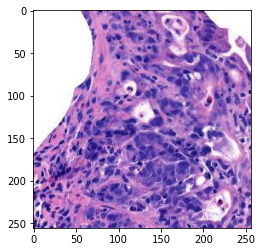

In [5]:
img = cv2.imread(data_path + img_list[8])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(256, 256))
print(img.shape)
plt.imshow(img)

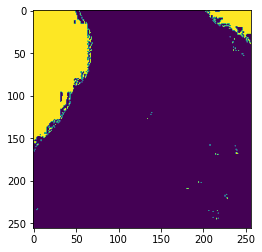

In [6]:
gray = img.mean(axis=2)
plt.imshow(gray >= 253.)

(256, 256, 3)


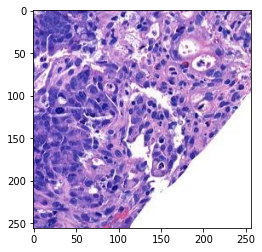

In [7]:
img = cv2.imread(data_path + img_list[9])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(256, 256))
print(img.shape)
plt.imshow(img)

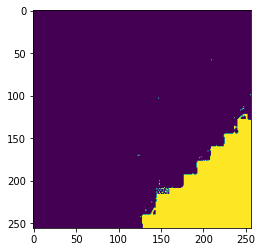

In [8]:
gray = img.mean(axis=2)
plt.imshow(gray >= 255.)

(256, 256, 3)


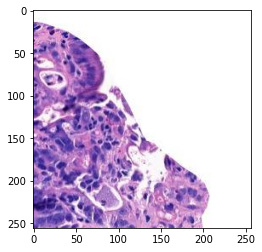

In [9]:
img = cv2.imread(data_path + img_list[11])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(256, 256))
print(img.shape)
plt.imshow(img)

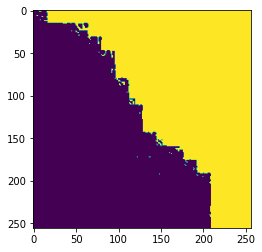

In [10]:
gray = img.mean(axis=2)
plt.imshow(gray >= 255.)

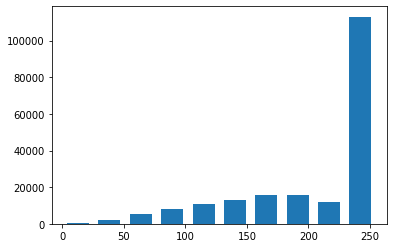

In [11]:
hist, bins = np.histogram(img, bins=10)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

(256, 256, 3)


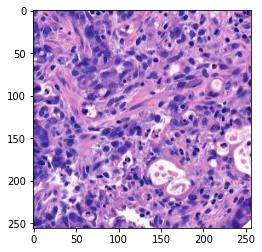

In [12]:
img = cv2.imread(data_path + img_list[12])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(256, 256))
print(img.shape)
plt.imshow(img)

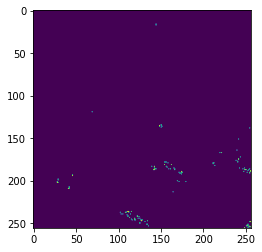

In [13]:
gray = img.mean(axis=2)
plt.imshow(gray >= 253.)

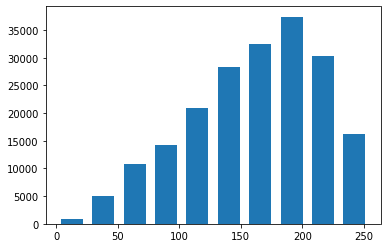

In [14]:
hist, bins = np.histogram(img, bins=10)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [115]:
!ls ../patches/train_data/Colon/N/train_colon_N_0001/

131_31.jpg  135_33.jpg	139_33.jpg  23_29.jpg  27_29.jpg  79_31.jpg  83_31.jpg
131_32.jpg  135_34.jpg	139_34.jpg  23_30.jpg  27_30.jpg  79_32.jpg  83_32.jpg
132_31.jpg  136_31.jpg	139_35.jpg  23_31.jpg  27_31.jpg  80_29.jpg  83_33.jpg
132_32.jpg  136_32.jpg	140_34.jpg  24_28.jpg  27_32.jpg  80_30.jpg  84_30.jpg
132_33.jpg  136_33.jpg	140_35.jpg  24_29.jpg  28_31.jpg  80_31.jpg  84_31.jpg
133_30.jpg  136_34.jpg	20_28.jpg   24_30.jpg  28_32.jpg  80_32.jpg  84_32.jpg
133_31.jpg  137_32.jpg	20_29.jpg   24_31.jpg  29_31.jpg  81_30.jpg  84_33.jpg
133_32.jpg  137_33.jpg	21_28.jpg   25_29.jpg  77_30.jpg  81_31.jpg  85_32.jpg
133_33.jpg  137_34.jpg	21_29.jpg   25_30.jpg  77_31.jpg  81_32.jpg  85_33.jpg
134_31.jpg  137_35.jpg	21_30.jpg   25_31.jpg  78_29.jpg  82_30.jpg  86_32.jpg
134_32.jpg  138_32.jpg	22_28.jpg   26_29.jpg  78_30.jpg  82_31.jpg  86_33.jpg
134_33.jpg  138_33.jpg	22_29.jpg   26_30.jpg  78_31.jpg  82_32.jpg
135_31.jpg  138_34.jpg	22_30.jpg   26_31.jpg  79_29.jpg  82_33.jpg
135_32.j

In [116]:
from augment import convert_RGB_to_OD, convert_OD_to_RGB, rgb_to_sda, sda_to_rgb
data_path = '../patches/train_data/Colon/N/train_colon_N_0001/'
img_list = os.listdir(data_path)

In [117]:
import time
print(len(img_list))
start_time = time.time()
stain_list = []
for i in img_list :
    img = cv2.imread(data_path + i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dsize=(128, 128))   
    sda_img = rgb_to_sda(img)
    sda_flat = sda_img.reshape(-1, 3)
    U, sigma, V = np.linalg.svd(sda_flat.T)
    stain_list.append(U)
print('total time ', time.time() - start_time)    

95
total time  286.7258017063141


In [118]:
stain_mat_list = []
for i in stain_list :
    if i[0,0] < 0:
        stain_mat_list.append(-1*i)
    else :
        stain_mat_list.append(i)

In [119]:
np.stack(stain_mat_list).reshape(-1, 9).mean(axis=0).reshape(3,3)

array([[ 0.52594301, -0.83961503, -0.05563272],
       [ 0.79520634,  0.46378454,  0.38152319],
       [ 0.2993344 ,  0.24503412, -0.91218593]])

Colon : anno_colon_D_0001/
array([[ 0.57141802, -0.7986031 , -0.17498368],
       [ 0.77947836,  0.46224811,  0.41835033],
       [ 0.25550306,  0.37556214, -0.88718088]])
Colon : anno_colon_M_0001     
array([[ 0.49743868, -0.82280475, -0.16048071],
       [ 0.80642505,  0.37115152,  0.41949946],
       [ 0.31349439,  0.33604615, -0.85343511]])
Colon : train_colon_N_0001  
array([[ 0.52594301, -0.83961503, -0.05563272],
       [ 0.79520634,  0.46378454,  0.38152319],
       [ 0.2993344 ,  0.24503412, -0.91218593]])


In [81]:
img = cv2.imread(data_path + img_list[4])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128))
od_img = convert_RGB_to_OD(img)
sda_img = rgb_to_sda(img)
print(np.max(od_img))
print(np.max(sda_img))

3.7495040759303713
165.51556185941388


In [82]:
sda_flat = sda_img.reshape(-1, 3)
od_flat = od_img.reshape(-1, 3)
sda_flat.shape

U, sigma, V = np.linalg.svd(sda_flat.T)
print(U)
print(sigma)

[[-0.55829573  0.82295685  0.10510899]
 [-0.78405573 -0.48194983 -0.39112783]
 [-0.27122407 -0.3007763   0.91431456]]
[5501.75687578  431.70262052  251.36778788]


In [79]:
# stain_mat = np.array([[-0.48333748,  0.87457766, -0.03871443],
#  [-0.81212054, -0.46445478, -0.35318832],
#  [-0.32687172, -0.13926837,  0.93475088]]) * -1

In [80]:
U

array([[-0.50712739,  0.86169203, -0.01756894],
       [-0.81036672, -0.48366414, -0.33071859],
       [-0.29347504, -0.15347917,  0.94356587]])

In [59]:
np.matmul(stain_mat.T, stain_mat)

array([[ 1.00000001e+00, -3.86601919e-09, -3.72118439e-09],
       [-3.86601919e-09,  1.00000000e+00, -3.54712980e-09],
       [-3.72118439e-09, -3.54712980e-09,  1.00000000e+00]])

In [52]:
(U ** 2).sum(axis=0)

array([1., 1., 1.])

In [40]:
sda_flat = sda_img.reshape(-1, 3)
sda_mean = sda_flat.mean(axis=0)
print(sda_mean)
sda_flat_mean = sda_flat - sda_mean
print(sda_flat_mean.max())

sda_cov = np.matmul(sda_flat_mean.T, sda_flat_mean)/(sda_flat_mean.shape[0]-1)
sda_cov

[ 6.07328425 11.13782875  4.38708376]
211.98717124728662


array([[145.11207255, 227.15113616,  92.50288949],
       [227.15113616, 378.62619519, 152.05575795],
       [ 92.50288949, 152.05575795,  64.31292399]])

In [43]:
eigv, eigm = np.linalg.eig(sda_cov)
print(eigv)
print(eigm)

[578.83738674   6.48407863   2.72972636]
[[ 0.49223145  0.86300893 -0.11368284]
 [ 0.8067454  -0.50134022 -0.31276162]
 [ 0.32690985 -0.062238    0.94300391]]


In [28]:
# I_0 = 256
# img_sda = -np.log(img/(1.*I_0)) * 255/np.log(I_0)

In [ ]:
# img_norm = img/255.
od_flat = od_img.reshape(-1,3)
od_mean = np.mean(od_flat, axis=0)
print(od_mean)

In [ ]:
od_flat_mean = od_flat - od_mean
od_flat_mean.shape

In [ ]:
od_covariance = np.matmul(od_flat_mean.T, od_flat_mean)/(od_flat_mean.shape[0] -1)
od_covariance

In [ ]:
# img_flat_mean

In [ ]:
# U, sigma, V = np.linalg.svd(od_covariance)
# print(sigma)
# print(U)
# print(V)

In [18]:
U, sigma, V = np.linalg.svd(np.random.uniform(6,3, (10000,3)).T)
U

array([[-0.57821624,  0.79804566, -0.16967353],
       [-0.57924319, -0.54799086, -0.60347606],
       [-0.57458099, -0.25065742,  0.77911972]])

In [ ]:
# eigenvalue, eigenmat = LA.eig(od_covariance)
# print(eigenvalue)
# print(np.sqrt(eigenvalue))
# print(eigenmat)

In [ ]:
print(eigenmat[0]*np.sqrt(eigenvalue)[0])
print(eigenmat[1]*np.sqrt(eigenvalue)[1])
print(eigenmat[2]*np.sqrt(eigenvalue)[2])

In [ ]:
np.sqrt((eigenmat ** 2).sum(0))

In [ ]:
np.matmul(eigenmat.T, eigenmat)

In [ ]:
eigenvalue, eigenmat = LA.eig(rgb_covariance)
print(eigenvalue)
print(eigenmat)

In [ ]:
eigen_value_list = []
eigen_mat_list = []
for i in img_list :
    path = data_path + i
#     print(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, dsize=(128, 128))    

    od_img = convert_RGB_to_OD(img)
    img_flat = od_img.reshape(-1,3)
    rgb_mean = np.mean(img_flat, axis=0)
    img_flat_mean = img_flat - rgb_mean
    rgb_covariance = np.matmul(img_flat_mean.T, img_flat_mean)/(img_flat_mean.shape[0] -1)
#     rgb_covariance = np.matmul(img_flat.T, img_flat)/(img_flat.shape[0] -1)
    eigenvalue, eigenmat = LA.eig(rgb_covariance)
    eigen_value_list.append(eigenvalue)
    eigen_mat_list.append(eigenmat)
    

In [ ]:
np.random.uniform(0,1)

In [ ]:
new_eigen_mat_list = []
for m in eigen_mat_list :
    if m[0,0] < 0 :
        new_eigen_mat_list.append(m*(-1.))
    else :
        new_eigen_mat_list.append(m)

In [ ]:
np_mat = np.stack(new_eigen_mat_list).reshape(len(new_eigen_mat_list), -1)
np_mat.shape

In [ ]:
np.mean(np_mat, axis=0).reshape(3,3)

In [ ]:
np_mat1 = np_mat - np.mean(np_mat, axis=0)

In [ ]:
(np.matmul(np_mat1.T, np_mat1)/(np_mat1.shape[0] -1)).diagonal()

In [ ]:
he_img = np.matmul(img, eigenmat.T )
he_img.shape

In [ ]:
# he_img[:,:,1]

In [ ]:
# LA.inv(eigenmat)

In [ ]:
# back_img = np.matmul(he_img, LA.inv(eigenmat).T)

In [120]:
from __future__ import print_function

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

(128, 128, 3)


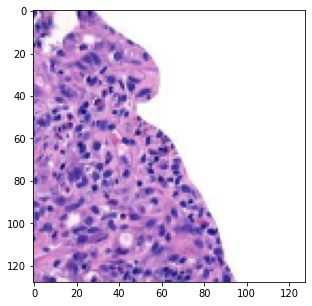

In [122]:
data_path = '../patches/train_data/Stomach/M/anno_stomach_M_0001/'
img_list = os.listdir(data_path)
img = cv2.imread(data_path + img_list[18])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(128, 128))
print(img.shape)
plt.imshow(img)

In [124]:
w_est_mat = []
I_0 = 256
for i in img_list :
    path = data_path + i
#     print(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    w_est = htk.preprocessing.color_deconvolution.rgb_separate_stains_macenko_pca(img, I_0)
    w_est_mat.append(w_est)

In [ ]:
# w_est_mat

In [125]:
np.mean(np.stack(w_est_mat).reshape(len(w_est_mat), -1), axis=0).reshape(3,3)

array([[ 0.22272289,  0.63413166, -0.05788868],
       [ 0.9100005 ,  0.73106678,  0.36749171],
       [ 0.34565661,  0.24949076, -0.92495346]])

In [ ]:
I_0 = 255
w_est = htk.preprocessing.color_deconvolution.rgb_separate_stains_macenko_pca(img, I_0)
w_est

In [ ]:
np.matmul(w_est.T, w_est)

In [ ]:
LA.inv(w_est)

In [ ]:
# create stain to color map
stain_color_map = htk.preprocessing.color_deconvolution.stain_color_map
print('stain_color_map:', stain_color_map, sep='\n')

# specify stains of input image
stains = ['hematoxylin',  # nuclei stain
          'eosin',        # cytoplasm stain
          'dab']         # set to null if input contains only two stains

# create stain matrix
W = np.array([stain_color_map[st] for st in stains]).T

In [ ]:
print(W)

In [ ]:
import girder_client
import numpy as np
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration

In [ ]:
augmented_img = rgb_perturb_stain_concentration(img)
plt.imshow(img)

In [ ]:
np.cos(5.5*np.pi/180)

In [ ]:
np.sin(5.5*np.pi/180)

In [ ]:
np.cos(10*np.pi/180)**2 + np.sin(10*np.pi/180)**2

In [ ]:
np.random.uniform(-10, 10)

In [ ]:
-np.sin(0)

In [ ]:
# theta1 = np.random.uniform(-1*theta1, theta1)*np.pi/180
theta1 = 9 *np.pi/180
rotate_mat1 = np.array(
    [[1., 0, 0],
    [0, np.cos(theta1), -np.sin(theta1)],
    [0, np.sin(theta1), np.cos(theta1)]])

rotate_mat2 = np.array(
    [[np.cos(theta1), 0, np.sin(theta1)],
    [0, 1., 0.],
    [-np.sin(theta1), 0., np.cos(theta1)]])

rotate_mat3 = np.array(
    [[np.cos(theta1), -np.sin(theta1), 0],
    [np.sin(theta1), np.cos(theta1), 0.],
    [0, 0., 1.]])

In [ ]:
np.matmul(np.matmul(rotate_mat3, np.matmul(rotate_mat2, rotate_mat1)), w_est_mat[0])

In [ ]:
np.matmul(np.matmul(rotate_mat3, np.matmul(rotate_mat2, rotate_mat1)), w_est_mat[0])

In [ ]:
test_conv_mat = np.array([[ 2.        ,  1.        ,  0.        ],
                           [ 1.        ,  1, 0],
                           [ 0.        ,  0,  1.]])

In [ ]:
np.matmul(test_conv_mat, img[0,0,:])

In [ ]:
np.matmul(img, test_conv_mat.T)[0,0,:]